<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/part1_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# chapter14. 가중치의 진짜 업데이트 (복습)
# 신경망에서는 수많은 가중치라는 매개변수를 가지는 복잡하고 어려운 함수에 의해 그 결과 값을 얻습니다.
# 오차: 학습 목표값과 실제 값 간의 차이. 우리는 결과함수(output function)를 쉽게 오차함수로 변환할 수 있습니다.

# 오차함수:(목표값-실제값)^2:제곱오차(squared error)
# 오차함수가 부드럽고 연속적이므로 경사하강법이 잘 동작하게 됩니다. 값이 갑자기 상승하거나 빈틈이 존재하지 않게 됩니다.

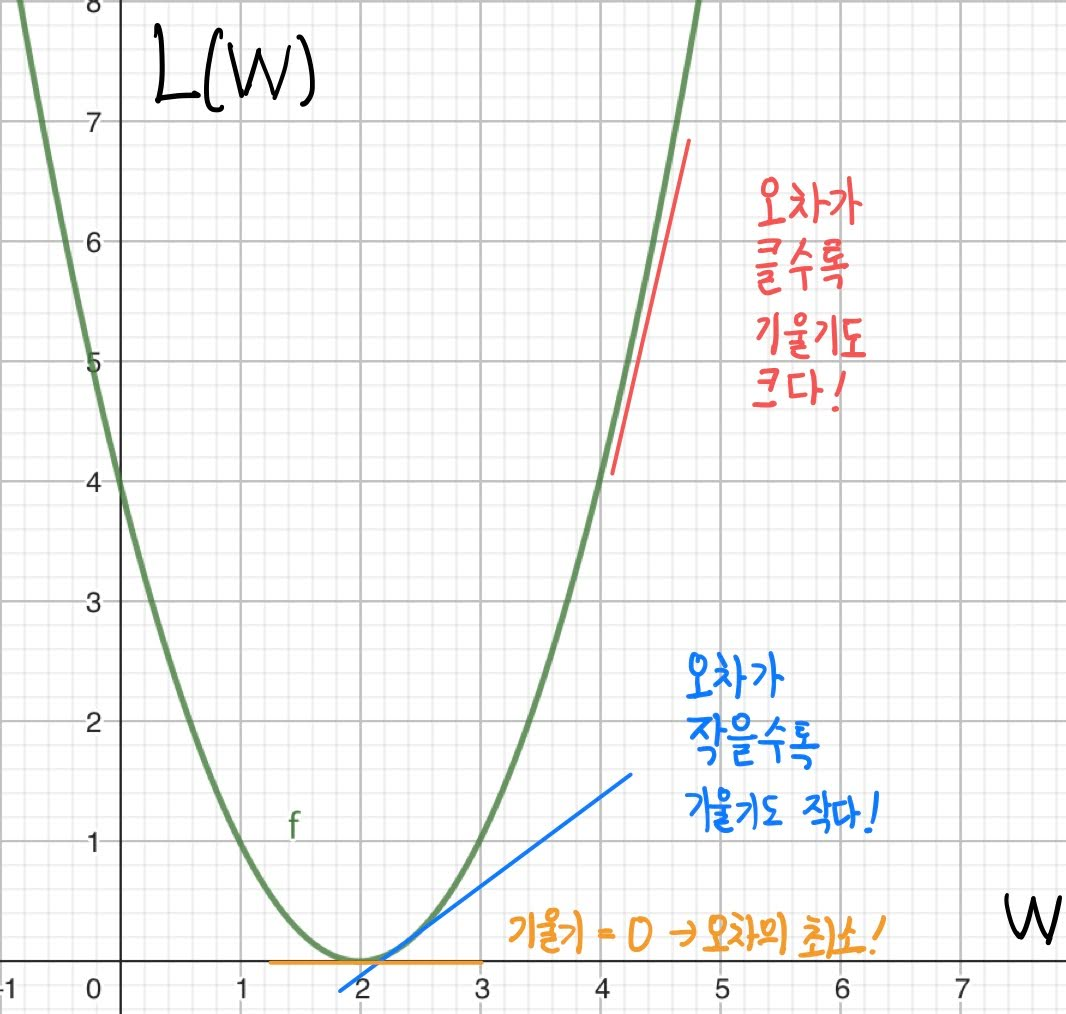

In [ ]:
# 가중치 w의 값이 변화함에 따라 오차 E의 값이 얼마만큼 변하는 지.
# 최저점의 방향으로 감소하기 원하는 오차함수의 기울기.

**16. 데이터 준비하기**

In [ ]:
# 신경망이 제대로 동작하지 않는 데에는 여러 가지 이유가 있을 수 있지만, 이 중 꽤 많은 경우는 학습 데이터, 가중치의 초기화,
# 결과 값을 디자인하는 것만으로 해결이 가능합니다.

# 입력값: 만약 입력 값이 크면 활성화 함수는 평평한 형태를 띠는 것을 볼 수 있습니다.

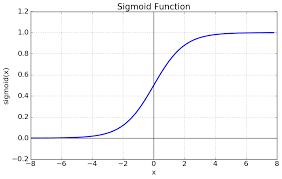

In [ ]:
# 우리는 기울기를 이용해 가중치를 업데이트하므로, 평평한 활성화 함수는 문제가 있습니다. 가중치의 변화에 수식을 다시 한번 생각해보면,
# 가중치의 변화는 활성화 함수의 기울기에 좌우됩니다. -> 가중치의 변화: 활성화 함수의 기울기에 좌우됩니다.
# 작은 기울기: 학습 능력에 제한된다는 것.

# 컴퓨터는 매우 작거나 매우 큰 수를 처리할 때 정확도를 잃을 수 있으므로 매우 작은 수도 문제가 될 수 있다.
# 좋은 방법: 입력 값이 0.0~1.0 사이에 놓이드록 그 크기를 조정하는 것.
# 때로는 입력 값에 0.01 같은 작은 오프셋 값을 더해서 입력 값이 0이 되는 것을 방지하기도 합니다.

# 만약 입력 값이 0이면 oj=0으로 설정되므로 가중치 업데이트 수식에 의한 학습능력이 죽어버리기 때문입니다.

**결과 값**

In [ ]:
# 신경망의 결과값: 마지막 계층의 노드들로부터 출력되는 신호.
# 로지스틱 함수는 1에 가까이는 갈 수 있지만 절대 1.0에 도달하지 못한다는 사실을 기억할 겁니다.
# 수학자들은 이를 일컬어 점근적으로(asymptotically) 1.0에 접근한다라고 표현합니다.

# 우리는 목표값을 도달 불가능한 값으로 설정하지 않도록 해야 하며, 활성화 함수가 출력할 수 있는 값으로 재조정해야 합니다.
# 0.0에서 1.0 사이 범위의 값을 이용하는 것이 일반적이지만, 불가능한 영역인 0.0과 1.0으로 설정되는 것을 막기 위해 0.01에서 0.99 사이의 값을 이용하기도 합니다.

**임의의 값으로 가중치 초기화**

In [ ]:
# 입력값, 출력값과 마찬가지의 원칙이 가중치에도 적용됩니다. 우리는 가중치의 초기화 시 큰 값을 피해야 합니다.
# 큰 값을 가지는 가중치는 신호를 크게 만들어 활성화 함수에 전달하게 되며, 이는 우리가 계속 언급하고 있는 포화를 일으켜 가중치를 학습하는 능력을 떨어뜨리게 되기 때문입니다.
# 가중치가 입력 신호의 크기를 신중하게 조정하는 데 쏟았던 노력을 망치지 않도록 해야 한다는 말.

# 수학자들이 도달한 결론은 노드로 오는 연결 노드의 개수에 루트를 씌운 다음 역수를 취해 얻은 값을 범위로 해서 가중치의 값을 초기화.

In [ ]:
# 가중치가 지나치게 큰 값으로 초기화하면 활성화 함수를 편향된 방향으로 편향시키게 될 것이며, 지나치게 큰 가중치는 그 활성화 함수를 포화시킬 것입니다.
# 그리고 노드로 들어오는 연결 노드가 많을수록 더 많은 신호들이 합쳐지게 됩니다. 그러므로 많은 연결 노드를 가지면, 가중치의 범위를 줄여야 한다는 것이
# 경험적으로 옳을 것입니다.

# 가중치의 초기 값을 모두 같은 값으로 설정하면 신경망에 있는 모든 노드들은 같은 신호 값을 받게 될 것이며, 이에 따라 각 출력 노드의 출력 값 역시 동일하게 될 것입니다.
# 오차를 역전파함으로써 가중치를 업데이트하는 과정에서 오차는 모든 같은 값으로 나뉘어 전파될 것입니다. 오차는 가중치의 값에 비례해 나뉜다는 점을 기억할 것입니다.
# 이는 결국 동일한 가중치 업데이트로 이어질 것이며, 또다시 동일한 값을 가지는 가중치라는 결과로 이어지게 됩니다. -> 잘 학습된 신경망은 가중치의 값들은 반드시 동일하지 않습니다.

**part2. 파이썬으로 인공 신경망 직접 만들기**

In [ ]:
# 배열: 엑셀에서 보게 되는 표처럼 값들을 표현한 것.
# 신경망을 만들 때도 배열은 매우 중요한 역할을 합니다. 우리는 배열을 이용해 입력 신호, 가중치, 출력신호의 행렬을 표현할 것입니다.
import numpy

# import: 외부로부터 추가적인 기능을 가져올 때 사용하는 명령어.
# 파이썬 외부로부터 특정 기능을 불러올 필요가 있습니다.
# numpy: 모듈

a=numpy.zeros([3,2]) #3행 2열
print('a값:\n',a)

a값:
 [[0. 0.]
 [0. 0.]
 [0. 0.]]


In [ ]:
# 배열에서 행과 열의 숫자는 1이 아니라 0부터 시작합니다.
# 좌측 상단은 [1,1]이 아니라 [0,0]입니다.
a[0,0]=1
a[0,1]=2
a[1,0]=9
a[2,1]=12

**배열을 시각화하기**

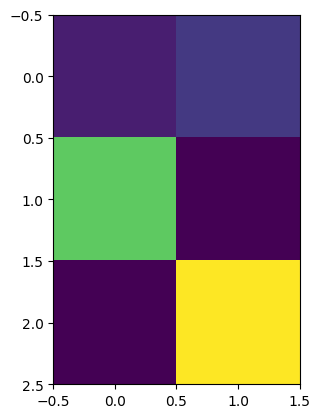

In [ ]:
# 많은 원소를 가지는 큰 배열의 경우, 이 원소들의 값을 하나씩 들여다보는 것은 그다지 직관적이지 않습니다.
# 2차원 배열의 숫자들을 시각화하는 한 방법은 배열 내 각 원소가 서로 다른 색상을 가지게 하는 것입니다.

import matplotlib.pyplot
matplotlib.pyplot.imshow(a, interpolation="nearest")

# 시각화: imshow()함수에 의해 수행됩니다.
# 우리는 나중에 imshow()함수를 이용해 신경망에서 전파되는 다양한 배열의 값들을 시각화해 볼 것입니다.

**객체**

In [ ]:
# 객체는 일단 정의해두면 원할때마다 사용할 수 있다는 점에서 재사용 가능한 함수와 유사합니다.
# 개 객체를 위한 클래스
class dog:
  def bark(self): # 매개변수로 self를 적는 이유: 파이썬이 함수를 생성할 때, 올바른 객체에 할당하기 위해서입니다.
    print("woof!")
    pass
  pass

# 객체: 정의 시 class라는 키워드 사용
# 함수: 정의 시 def라는 키워드 사용

sizzles=dog() # dog 클래스의 정의로부터 sizzels라는 객체 생성.
sizzles.bark()
# sizzles 객체의 일부분인 거처럼 bark()함수를 호출하고 있다. 이게 가능한 이유는 dog클래스로부터 생성된 모든 객체는
# bark()함수를 가질 수 있기 때문입니다.

# sizzles=dog(): sizzels는 dog 클래스의 형태를 가지고 생성된 객체.

woof!


In [ ]:
sizzles=dog()
mutley=dog()

sizzles.bark()
mutley.bark() # sizzles, mutley라는 2개의 객체를 생성.
# 객체가 어떤 형태를 가지며, 어떻게 동작해야 하는 지에 대해 클래스로 정의를 해두고, 필요할 때마다 그 클래스의 인스턴스를
# 생성하면 된다는 얘기입니다.

# 클래스: 정의, 객체: 그 정의를 현실에서 구현한 인스턴스
# 클래스는 정의이며, 객체는 그 정의를 현실에서 구현한 인스턴스.

# ex) class: 책에 있는 케이크 조리법
# 객체(objec)

woof!
woof!
